In [332]:
using StatsBase, Plots
include("../code/slim_graphs.jl")
include("../code/matrix_generator.jl")

valid_degrees (generic function with 2 methods)

In [307]:
function findbasis_partial(H, Ht = sparse(transpose(H)))
    rowperm, colperm = leaf_removal(H, Ht)
    Hnew = H[rowperm, colperm]
    ut2diagGF2!(Hnew)
    B = Hnew[:, size(Hnew, 1)+1:end]
    indep = colperm[size(H,1)+1:end]
    B, indep
end 

findbasis_partial (generic function with 2 methods)

## 1. Monitor the performance of leaf removal as a strategy to build basis

Build an instance with $f_2=1, f_1\approx 0$

In [ ]:
function degree2_mat(N)
    f1 = 0.0
    N1 = Int(N*f1)
    Q = mod1(sum(digits(2N-N1)),3)
    N1 = N1 + Q
    N2 = N - N1
    nedges = (N1+2N2)
    M = Int(nedges/3)
    Lambda = [N1, N2] / N
    @assert sum(Lambda)==1
    Rho = [0,0,1]
    Ht = ldpc_matrix(N, M, nedges, Lambda, Rho, accept_multi_edges=false)
    H = sparse(Ht')
    H,Ht
end

In [266]:
f1 = 0.0
N = 2*10^4
N1 = Int(N*f1)
Q = mod1(sum(digits(2N-N1)),3)
N1 = N1 + Q
N2 = N - N1
nedges = (N1+2N2)
M = Int(nedges/3)
Lambda = [N1, N2] / N
@assert sum(Lambda)==1
Rho = [0,0,1]

3-element Vector{Int64}:
 0
 0
 1

In [267]:
Ht = ldpc_matrix(N, M, nedges, Lambda, Rho, accept_multi_edges=false)
H = sparse(Ht');
using BenchmarkTools

Break down `findbasis(H, Ht) in Main at /home/crotti/sourcecoding/code/slim_graphs.jl:97` and benchmark each line

In [268]:
rowperm, colperm = leaf_removal(H, Ht)
@btime rowperm, colperm = leaf_removal($H, $Ht);

  26.250 ms (133425 allocations: 23.33 MiB)


In [278]:
Hnew = H[rowperm, colperm]
@btime Hnew = H[$rowperm, $colperm];

  7.953 ms (20 allocations: 1.61 MiB)


In [290]:
# @benchmark ut2diagGF2!($(copy(Hnew)))
@btime ut2diagGF2!(HH) setup=(HH=copy(Hnew))

  11.927 s (154718 allocations: 19.52 MiB)


21081×31623 SparseMatrixCSC{Bool, Int64} with 290690 stored entries:
⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠻⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⢿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉

In [288]:
Hnew = H[rowperm, colperm]
# @time ut2diagGF2!(Hnew);

In [271]:
ut2diagGF2!(Hnew);

In [272]:
B = [Hnew[:, size(Hnew, 1)+1:end]; I]
@btime B = [$Hnew[:, size($Hnew, 1)+1:end]; I];

  5.615 ms (25 allocations: 18.11 MiB)


In [273]:
indep = colperm[size(H,1)+1:end]
@btime indep = $colperm[size($H,1)+1:end];

  38.556 μs (2 allocations: 260.52 KiB)


In [274]:
@btime $B[invperm($colperm),:], $indep;

  73.400 ms (21 allocations: 13.60 MiB)


In [335]:
Ns = round.(Int, 10 .^ (3:0.5:4.5))
times_old = zeros(length(Ns))
times_new = zeros(length(Ns))
for (i,N) in pairs(Ns)
    println("## Size $i of ", length(Ns), ": N=$N")
    N1 = Int(N*f1)
    Q = mod1(sum(digits(2N-N1)),3)
    N1 = N1 + Q
    N2 = N - N1
    nedges = (N1+2N2)
    M = Int(nedges/3)
    Lambda = [N1, N2] / N
    @assert sum(Lambda)==1
    Ht = ldpc_matrix(N, M, nedges, Lambda, Rho, accept_multi_edges=false)
    H = sparse(Ht')
    rowperm, colperm = leaf_removal(H, Ht)
    Hnew = H[rowperm, colperm]
    t = @timed ut2diagGF2!(copy(Hnew))
    times_old[i] = t[2]
    t = @timed ut2diagGF2(Hnew)
    times_new[i] = t[2]
end

## Size 1 of 4: N=1000
## Size 2 of 4: N=3162
## Size 3 of 4: N=10000
## Size 4 of 4: N=31623


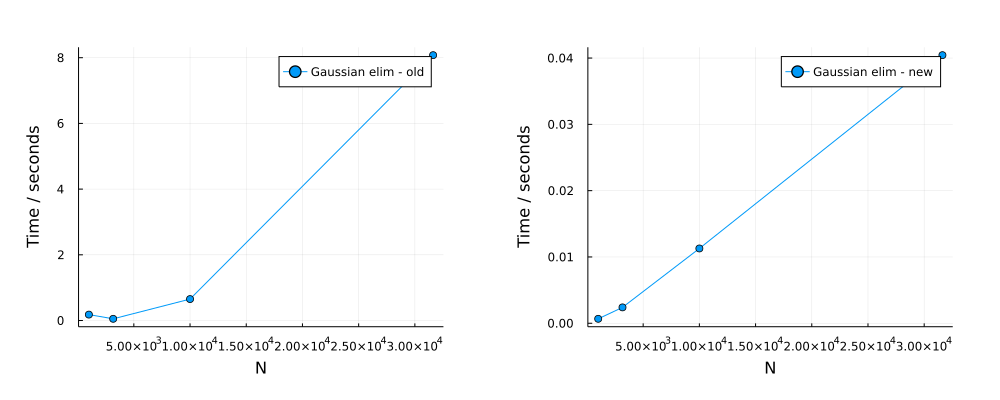

In [336]:
p1 = plot(Ns, times_old, marker=:circle, label="Gaussian elim - old", xlabel="N", ylabel="Time / seconds")
p2 = plot(Ns, times_new, marker=:circle, label="Gaussian elim - new", xlabel="N", ylabel="Time / seconds")
plot(p1,p2, size=(1000,400), margins=10Plots.mm)

### Scaling of the computation time

In [ ]:
f1 = 0.0
Rho = [0,0,1]
Ns = round.(Int,10^3 * 1:10:51)
navg = 10
times = zeros(length(Ns))
memory = zeros(length(Ns))

for (i,N) in pairs(Ns)
    println("## Size $i of ", length(Ns))
    N1 = Int(N*f1)
    Q = mod1(sum(digits(2N-N1)),3)
    N1 = N1 + Q
    N2 = N - N1
    nedges = (N1+2N2)
    M = Int(nedges/3)
    Lambda = [N1, N2] / N
    @assert sum(Lambda)==1
    Ht = ldpc_matrix(N, M, nedges, Lambda, Rho, accept_multi_edges=false)
    H = sparse(Ht')
    for j in 1:navg
        t = @timed (B, indep = findbasis(H, Ht))
        times[i] += t[2]/navg
        memory[i] += t[3]/navg
    end
end

## Size 1 of 7
## Size 2 of 7
## Size 3 of 7
## Size 4 of 7
## Size 5 of 7
## Size 6 of 7


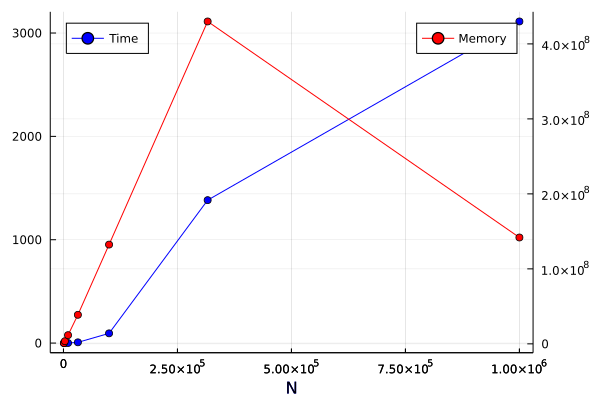

In [235]:
plot(Ns, times, marker=:circle, color=:blue, label="Time", legend=:topleft, foreground_color_guide=:blue)
plot!(twinx(), Ns, memory, marker=:circle, color=:red, label="Memory", yforeground_color_guide=:red)
plot!(xlabel="N", right_margin=15Plots.mm)

In [ ]:
plot(Ns[1:end], times[1:end], marker=:circle, color=:blue, label="Time", legend=:topleft, foreground_color_guide=:blue)
plot!(twinx(), Ns[1:end], memory[1:end], marker=:circle, color=:red, label="Memory", yforeground_color_guide=:red)
plot!(xlabel="N", right_margin=15Plots.mm)

## 2. Observe horizontal and vertical weights

In [301]:
f1s = 0:0.1:0.9
f1s = [0]
N = 10^6
horiz = []
vert = []
@showprogress for (i,f1) in enumerate(f1s)
    N1 = Int(N*f1)
    Q = mod1(sum(digits(2N-N1)),3)
    N1 = N1 + Q
    N2 = N - N1
    nedges = (N1+2N2)
    M = Int(nedges/3)
    Lambda = [N1, N2] / N
    @assert sum(Lambda)==1
    Rho = [0,0,1]
    Ht = ldpc_matrix(N, M, nedges, Lambda, Rho, accept_multi_edges=false)
    H = sparse(Ht')
    B = findbasis_partial(H, Ht)
    push!(horiz, vec(sum(B,dims=2)))
    push!(vert, vec(sum(B,dims=1)))
end

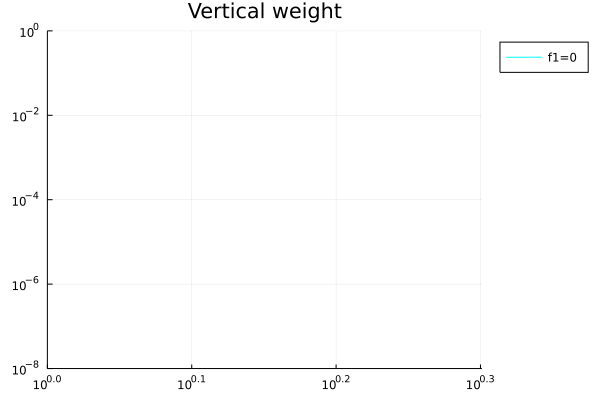

In [302]:
colors = cgrad(:cool, length(f1s)+1, categorical = true)
plv = plot()
for i in eachindex(f1s)
    hv = fit(Histogram, vert[i],nbins=20)
    hv = normalize(hv)
    plot!(plv, hv.edges[1][1:end-1], hv.weights, label="f1=$(f1s[i])", color=colors[i])
#     histogram!(plv, vert[i], yaxis=(:log10,(1e-5,Inf)), normalize=:pdf)
end
plot(plv, yaxis=(:log10,(1e-8,Inf)), xaxis=(:log10,(1,Inf)), title="Vertical weight",
    legend=:outertopright)

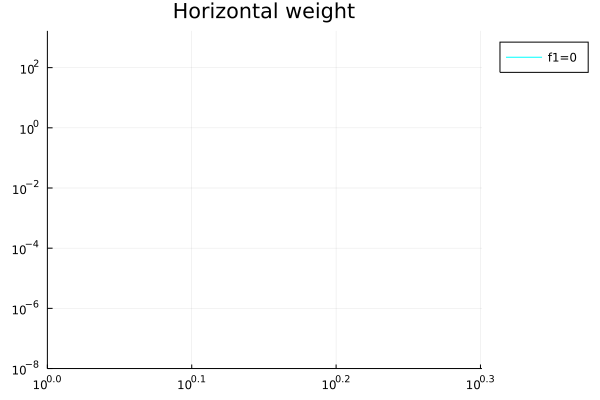

GKS: Number of points is invalid in routine POLYLINE


In [303]:
colors = cgrad(:cool, length(f1s)+1, categorical = true)
plh = plot()
for i in 1:length(f1s)
    hh = fit(Histogram,horiz[i],nbins=10^4)
    hh = normalize(hh)
    plot!(plh, hh.edges[1][1:end-1], hh.weights, label="f1=$(f1s[i])", color=colors[i])
#     histogram!(plv, vert[i], yaxis=(:log10,(1e-5,Inf)), normalize=:pdf)
end
plot(plh, yaxis=(:log10,(1e-8,Inf)), xaxis=(:log10,(1,Inf)), title="Horizontal weight",
    legend=:outertopright)